# penguins_classification

In [1]:
from sklearn import tree
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
df.shape

(344, 7)

In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.shape

(333, 7)

In [13]:
print(df.island.unique())
print(df.body_mass_g.unique())
print(df.sex.unique())
print(df.species.unique())

['Torgersen' 'Biscoe' 'Dream']
[3750. 3800. 3250. 3450. 3650. 3625. 4675. 3200. 4400. 3700. 4500. 3325.
 4200. 3400. 3600. 3950. 3550. 3150. 3900. 3300. 4150. 4650. 3100. 3000.
 4600. 3425. 3500. 4300. 4050. 2900. 2850. 3350. 4100. 3050. 4450. 4250.
 4000. 4700. 4350. 3725. 4725. 3075. 2925. 3175. 4775. 3825. 4275. 4075.
 3775. 3875. 3275. 4475. 3975. 3475. 3525. 3575. 4550. 3850. 4800. 2700.
 3675. 5700. 5400. 5200. 5150. 5550. 5850. 6300. 5350. 5000. 5050. 5100.
 5650. 5250. 6050. 4950. 4750. 4900. 5300. 4850. 5800. 6000. 5950. 4625.
 5450. 5600. 4875. 4925. 4975. 5500. 4575. 4375. 5750.]
['MALE' 'FEMALE']
['Adelie' 'Chinstrap' 'Gentoo']


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['island'] = label_encoder.fit_transform(dfi['island'])
print(label_encoder.classes_)
dfi['body_mass_g'] = label_encoder.fit_transform(dfi['body_mass_g'])
print(label_encoder.classes_)
dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(label_encoder.classes_)
dfi['species'] = label_encoder.fit_transform(dfi['species'])
print(label_encoder.classes_)

['Biscoe' 'Dream' 'Torgersen']
[2700. 2850. 2900. 2925. 3000. 3050. 3075. 3100. 3150. 3175. 3200. 3250.
 3275. 3300. 3325. 3350. 3400. 3425. 3450. 3475. 3500. 3525. 3550. 3575.
 3600. 3625. 3650. 3675. 3700. 3725. 3750. 3775. 3800. 3825. 3850. 3875.
 3900. 3950. 3975. 4000. 4050. 4075. 4100. 4150. 4200. 4250. 4275. 4300.
 4350. 4375. 4400. 4450. 4475. 4500. 4550. 4575. 4600. 4625. 4650. 4675.
 4700. 4725. 4750. 4775. 4800. 4850. 4875. 4900. 4925. 4950. 4975. 5000.
 5050. 5100. 5150. 5200. 5250. 5300. 5350. 5400. 5450. 5500. 5550. 5600.
 5650. 5700. 5750. 5800. 5850. 5950. 6000. 6050. 6300.]
['FEMALE' 'MALE']
['Adelie' 'Chinstrap' 'Gentoo']


In [17]:
X_data = dfi[['island', 'body_mass_g', 'sex']].values
y_data = dfi['species'].values

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [19]:
model = tree.DecisionTreeClassifier(max_depth=3)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
y = model.predict(X_train)

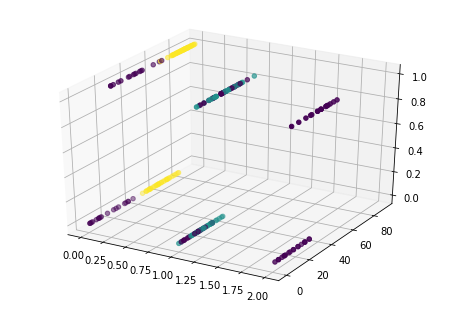

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train)
plt.show()

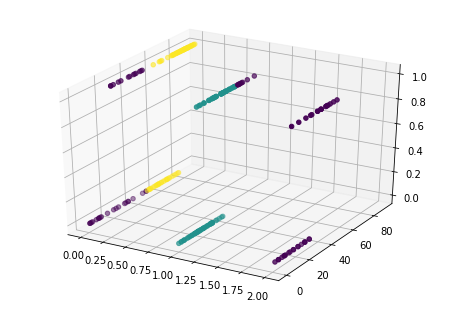

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y)
plt.show()

In [24]:
print(model.score(X_train, y_train))

0.8082706766917294


In [25]:
print(model.score(X_test, y_test))

0.7910447761194029


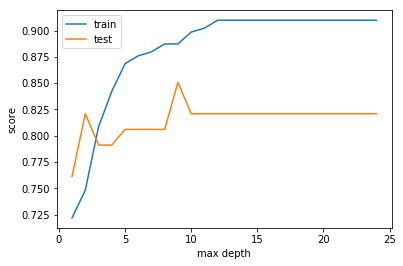

In [26]:
from sklearn.tree import DecisionTreeRegressor

train_score = []
test_score = []
depth_range = range(1, 25)

for depth in depth_range:
    model = tree.DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

plt.figure()
plt.plot(depth_range, train_score, label='train')
plt.plot(depth_range, test_score, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()